In [6]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import random
import time
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [14]:
# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Select binary data
label_sub = [0,1]
x_train_sub = [x for x, y in zip(x_train, y_train) if y in label_sub]
y_train_sub = [y for y in y_train if y in label_sub]
x_test_sub = [x for x, y in zip(x_test, y_test) if y in label_sub]
y_test_sub = [y for y in y_test if y in label_sub]


print('There are', len(x_train_sub), 'training images.')
print('There are', len(x_test_sub), 'test images.')

There are 12665 training images.
There are 2115 test images.


2


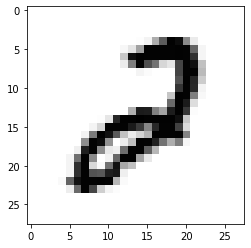

In [19]:
image_index = 555 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [17]:
x_train.shape

(60000, 28, 28)

In [10]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [11]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
# Evaluating the Model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.2063 - accuracy: 0.9386
Epoch 2/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0813 - accuracy: 0.9758
Epoch 3/10
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0573 - accuracy: 0.9816
Epoch 4/10
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0443 - accuracy: 0.9857
Epoch 5/10
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0339 - accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0294 - accuracy: 0.9900
Epoch 7/10
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0254 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0208 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0206 - accuracy: 0.9930
Epoch 10/10
